# Titanic Survival Prediction using Logistic Regression

## **Step 1: Load the Dataset**
We first load the Titanic dataset using **pandas** and inspect its structure.

In [13]:
import pandas as pd

# Load the dataset
file_path = "/mnt/data/Titanic_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Key Learning Points**:
- Understand the dataset format.
- Recognize common issues like missing values.

## **Step 2: Understand the Dataset**
We inspect the dataset's columns and types.

In [28]:
print(df.shape)
df.info()
df.describe()

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(2)
memory usage: 71.3+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


### **Key Learning Points**:
- **Categorical vs. Numerical Data**: Identify which columns are categorical (e.g., "Sex", "Embarked") and which are numerical (e.g., "Age", "Fare").
- **Check for Missing Values**.

---

## **Step 3: Exploratory Data Analysis (EDA)**
We visualize and analyze data distributions to understand patterns.

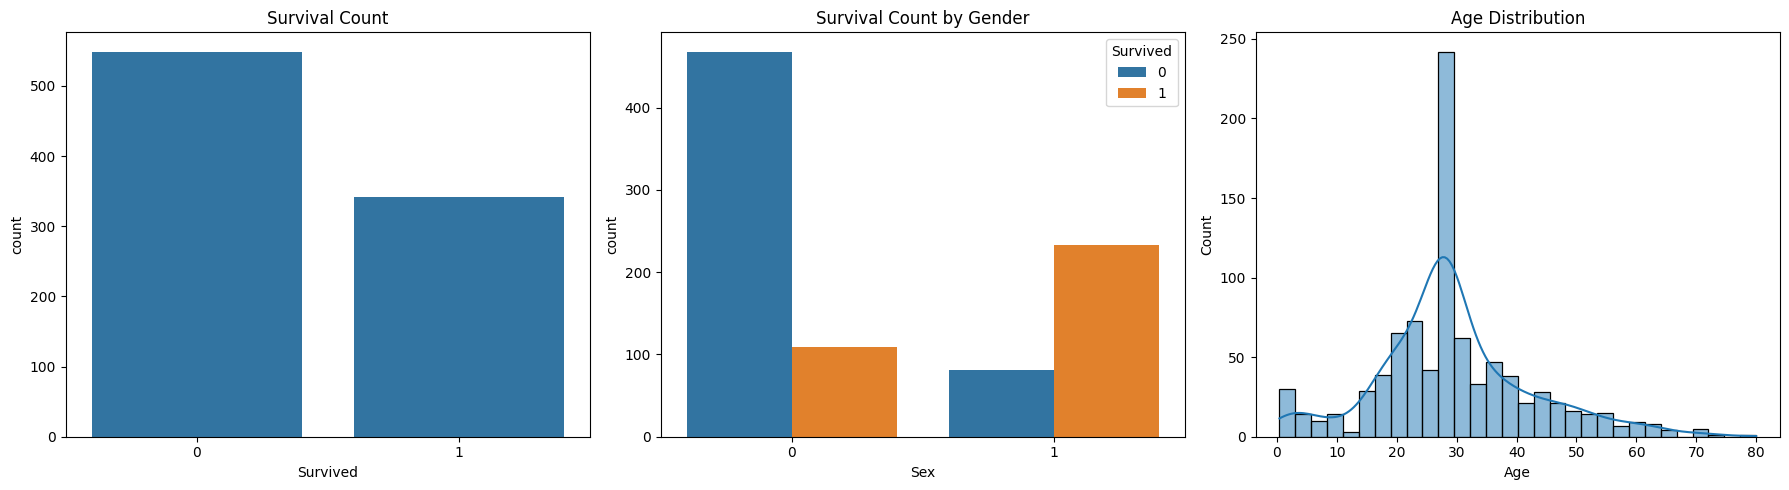

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Check survival distribution
sns.countplot(x="Survived", data=df, ax=axes[0])
axes[0].set_title("Survival Count")

# Visualizing the impact of gender
sns.countplot(x="Sex", hue="Survived", data=df, ax=axes[1])
axes[1].set_title("Survival Count by Gender")

# Distribution of age
sns.histplot(df["Age"].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title("Age Distribution")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **Key Learning Points**:
- Class imbalance in survival.
- Gender-based survival differences.
- Age distribution insights.

---

## **Step 4: Handle Missing Values**
We check and fill missing values appropriately.

In [16]:
# Check missing values
print(df.isnull().sum())

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

print(df.isnull().sum())  # Confirm no missing values remain

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


# **Imputation with Mean, Median, and Mode**

## **What is Imputation?**
Imputation is the process of replacing missing values in a dataset with substituted values. It is a crucial step in data preprocessing because many machine learning algorithms do not handle missing values well.

---

## **1. Mean Imputation**
- **Definition**: The mean (average) is calculated by summing all values and dividing by the count.
- **Formula**:  
  \[
  \text{Mean} = \frac{\sum X}{N}
  \]
- **When to Use**:  
  - Works well for **normally distributed** data.
  - Not suitable for **skewed** distributions, as extreme values (outliers) can significantly affect the mean.

---

## **2. Median Imputation**
- **Definition**: The median is the middle value when data is sorted.
- **Formula**:  
  - If **odd number** of values:  
    \[
    \text{Median} = \text{Middle value}
    \]
  - If **even number** of values:  
    \[
    \text{Median} = \frac{\text{Middle two values}}{2}
    \]
- **When to Use**:
  - Preferred when data is **skewed** or contains **outliers**.
  - More robust than the mean, as it is less affected by extreme values.

---

## **3. Mode Imputation**
- **Definition**: The mode is the most frequently occurring value in a dataset.
- **When to Use**:
  - Ideal for **categorical data** (e.g., "Embarked" column).
  - Used when a specific category appears **dominantly** in a dataset.

---

## **Why Use Median for "Age" and Mode for "Embarked"?**
### **"Age" (Numerical Feature)**
- The **Age** column in the Titanic dataset has missing values.
- Since age distribution is often **skewed**, the **median** is preferred over the mean to avoid the influence of outliers.
- **Example**: If a dataset has ages `[10, 20, 25, 30, 35, 100]`, the **mean** would be skewed by 100, while the **median (27.5)** represents the central tendency better.

```python
df["Age"].fillna(df["Age"].median(), inplace=True)
```

---

### **"Embarked" (Categorical Feature)**
- The **Embarked** column represents ports (e.g., 'S', 'C', 'Q') where passengers boarded.
- Since it is **categorical**, using the **mode (most frequent category)** makes sense.
- **Example**: If most passengers embarked from **'S'**, we replace missing values with **'S'**.

```python
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
```

---

## **Summary of Usage**
| Method  | Best for  | Why?  | Example Column |
|---------|----------|------|---------------|
| **Mean** | Numerical (Normally Distributed) | Affected by outliers, useful for balanced data | Not used in Titanic (Age is skewed) |
| **Median** | Numerical (Skewed Data) | Less affected by outliers | `Age` |
| **Mode** | Categorical Data | Fills missing values with the most common category | `Embarked` |

By choosing the **right imputation method**, we ensure better data quality and improve model accuracy. 🚀
### **Key Learning Points**:
- Handling missing values strategically.
- Why we drop high-missing-value columns.

---

## **Step 5: Convert Categorical Features**
We encode categorical variables for model training.


In [17]:
# Convert 'Sex' column to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


### **Key Learning Points**:
- Encoding categorical data.
- One-hot encoding and binary mapping.

---

## **Step 6: Select Features and Split Data**
We choose meaningful features and split data for training and testing.

In [18]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 6), (179, 6))

### **Key Learning Points**:
- Feature selection.
- Splitting data for training/testing.

---

## **Step 7: Train Logistic Regression Model**
We use **scikit-learn** to train a **Logistic Regression model** on the Titanic dataset.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)


### **Key Learning Points**:
- Understand how **Logistic Regression** works as a classification model.
- Learn about the **maximum iterations (`max_iter`)** parameter for convergence.

---

## **Step 8: Evaluate Model Performance**
We evaluate how well the model performs using **accuracy**, **confusion matrix**, and **classification report**.

In [20]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Model Accuracy: 0.7989
Confusion Matrix:
 [[88 17]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### **Key Learning Points**:
- **Accuracy**: Measures overall performance.
- **Confusion Matrix**: Helps analyze false positives and false negatives.
- **Precision, Recall, F1-score**: Key classification metrics.

---

## **Step 9: Interpret the Model**
Understanding the influence of each feature in the model.

In [21]:
# Print model coefficients
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": log_reg.coef_[0]})
print(feature_importance)

      Feature  Coefficient
0      Pclass    -1.006123
1         Sex     2.459082
2         Age    -0.024626
3        Fare     0.000361
4  Embarked_Q    -0.099261
5  Embarked_S    -0.512697


### **Key Learning Points**:
- **Positive coefficients**: Increase survival probability.
- **Negative coefficients**: Decrease survival probability.
- **Interpreting the magnitude of the impact of each feature**.

---

## **Step 10: Make Predictions on New Data**
We can test the model on new hypothetical passengers.

In [26]:
import numpy as np

# Example: A female passenger, 25 years old, in class 2, fare 20, embarked from C
new_passenger = np.array([[2, 1, 25, 20, 1, 0]])  # Adjust the feature order accordingly
predicted_survival = log_reg.predict(new_passenger)
predicted_survival_prob = log_reg.predict_proba(new_passenger)
# Display result
print("Predicted Survival:", "Survived" if predicted_survival[0] == 1 else "Did Not Survive", f"({predicted_survival_prob[0][1]:.2%})")

Predicted Survival: Survived (84.01%)


/home/kaveh/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/kaveh/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **Key Learning Points**:
- How to **apply the trained model** to new data.
- How to **structure input features** correctly.

---

## **Step 11: Improve the Model (Optional)**
To improve the model, students can:
- **Feature Engineering**: Add more features (e.g., family size, title extraction from names).
- **Regularization**: Tune hyperparameters to prevent overfitting.
- **Try Other Models**: Compare with Decision Trees, Random Forest, or SVM.